In [136]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [135]:
# Import all necessary libraries for the sql connections
import psycopg2
from sql import engine #adjust this as necessary to match your sql.py connection methods
# Import connection parameters: host, port, database, user, password
import sqlalchemy
from sql import host, port, database, user, password

conn = psycopg2.connect(host=host,
                        port=port,
                        database=database,
                        user=user,
                        password=password)

print(conn)

<connection object at 0x29f0bcac0; dsn: 'user=alexanderklar password=xxx dbname=postgres host=data-analytics-course.c8g8r1deus2v.eu-central-1.rds.amazonaws.com port=5432', closed: 0>


# EDA Laerm

In [143]:
# calling the noise per month (or day) table from sql

sql_query = 'SELECT * FROM cap_air.noise_data_month_de'
#sql_query = 'SELECT * FROM cap_air.noise_data_de'
df_noise_month = pd.read_sql_query(sql_query, conn)
df_noise_month

,LTag(18),LTagrand,LNacht,Lden,LTag(22),Ldn,NAT,r_number,region,s_number,station,Date
0,NaN,35.2,30.5,37.7,32.0,36.8,0,2,Berlin,62,Berlin/Friedrichshagen MSD xxx,2017-01-01
1,NaN,34.3,NaN,35.8,30.4,34.5,0,2,Berlin,62,Berlin/Friedrichshagen MSD xxx,2017-02-01
2,32.4,33.8,NaN,36.5,32.8,35.5,0,2,Berlin,62,Berlin/Friedrichshagen MSD xxx,2017-03-01
3,33.2,35.5,30.4,38.1,33.9,37.0,0,2,Berlin,62,Berlin/Friedrichshagen MSD xxx,2017-04-01
4,38.4,38.3,NaN,39.2,38.4,37.7,0,2,Berlin,62,Berlin/Friedrichshagen MSD xxx,2017-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...
13915,39.4,34.3,NaN,38.7,38.5,38.0,2,15,Saarbruecken,1,Saarbruecken,2021-08-01
13916,38.6,34.1,NaN,37.2,37.9,36.4,0,15,Saarbruecken,1,Saarbruecken,2021-09-01
13917,34.9,37.0,NaN,37.1,35.5,35.2,0,15,Saarbruecken,1,Saarbruecken,2021-10-01
13918,35.3,32.0,NaN,34.8,34.7,33.9,0,15,Saarbruecken,1,Saarbruecken,2021-11-01


In [196]:
# calling the noise per day table from sql

#sql_query = 'SELECT * FROM cap_air.noise_data_month_de'
sql_query = 'SELECT * FROM cap_air.noise_data_de'
df_noise_day = pd.read_sql_query(sql_query, conn)
df_noise_day

,Date,LTag(18),LTagrand,LNacht,Lden,LTag(22),Ldn,NAT,r_number,region,s_number,station
0,2017-01-01,NaN,41.3,34.9,42.4,35.4,40.9,0.0,2,Berlin,62,Berlin/Friedrichshagen MSD xxx
1,2017-01-02,NaN,36.4,34.9,40.7,30.3,40.0,0.0,2,Berlin,62,Berlin/Friedrichshagen MSD xxx
2,2017-01-03,NaN,33.1,NaN,36.0,NaN,35.1,0.0,2,Berlin,62,Berlin/Friedrichshagen MSD xxx
3,2017-01-04,36.9,36.5,34.5,41.5,36.8,41.0,0.0,2,Berlin,62,Berlin/Friedrichshagen MSD xxx
4,2017-01-05,NaN,35.5,NaN,33.0,NaN,NaN,0.0,2,Berlin,62,Berlin/Friedrichshagen MSD xxx
...,...,...,...,...,...,...,...,...,...,...,...,...
405784,2021-12-27,38.6,NaN,NaN,35.6,37.4,35.6,0.0,15,Saarbruecken,1,Saarbruecken
405785,2021-12-28,31.6,NaN,NaN,NaN,30.3,NaN,0.0,15,Saarbruecken,1,Saarbruecken
405786,2021-12-29,NaN,39.8,NaN,37.4,34.8,33.0,0.0,15,Saarbruecken,1,Saarbruecken
405787,2021-12-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,15,Saarbruecken,1,Saarbruecken


In [146]:
# showing the shape of our dataset
df_noise_month.shape

(13920, 12)

In [147]:
df_noise_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13920 entries, 0 to 13919
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   LTag(18)  11126 non-null  float64       
 1   LTagrand  11192 non-null  float64       
 2   LNacht    8452 non-null   float64       
 3   Lden      11912 non-null  float64       
 4   LTag(22)  11319 non-null  float64       
 5   Ldn       11684 non-null  float64       
 6   NAT       13920 non-null  object        
 7   r_number  13920 non-null  int64         
 8   region    13920 non-null  object        
 9   s_number  13920 non-null  int64         
 10  station   13920 non-null  object        
 11  Date      13920 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(3)
memory usage: 1.3+ MB


In [197]:
# Using only the relevant columns
df_noise_month = df_noise_month[['Date', 'Lden', 'LTag(22)', 'LNacht','r_number', 'region','s_number','station']]
df_noise_day = df_noise_day[['Date', 'Lden', 'LTag(22)', 'LNacht','r_number', 'region','s_number','station']]

#selecting only the 11 largest airports - which we are using as well for the flights
cities = [2,24,14,27,4,1,16,5,3,9,18]
df_noise_month = df_noise_month[df_noise_month['r_number'].isin(cities)]
df_noise_day = df_noise_day[df_noise_day['r_number'].isin(cities)]

display(df_noise_month)
display(df_noise_day)


,Date,Lden,LTag(22),LNacht,r_number,region,s_number,station
0,2017-01-01,37.7,32.0,30.5,2,Berlin,62,Berlin/Friedrichshagen MSD xxx
1,2017-02-01,35.8,30.4,NaN,2,Berlin,62,Berlin/Friedrichshagen MSD xxx
2,2017-03-01,36.5,32.8,NaN,2,Berlin,62,Berlin/Friedrichshagen MSD xxx
3,2017-04-01,38.1,33.9,30.4,2,Berlin,62,Berlin/Friedrichshagen MSD xxx
4,2017-05-01,39.2,38.4,NaN,2,Berlin,62,Berlin/Friedrichshagen MSD xxx
...,...,...,...,...,...,...,...,...
13843,2021-08-01,41.7,39.6,32.2,18,Muenchen,10,Markt Schwaben (ZMS2)
13844,2021-09-01,39.2,38.2,NaN,18,Muenchen,10,Markt Schwaben (ZMS2)
13845,2021-10-01,41.0,40.8,NaN,18,Muenchen,10,Markt Schwaben (ZMS2)
13846,2021-11-01,38.2,34.8,NaN,18,Muenchen,10,Markt Schwaben (ZMS2)


,Date,Lden,LTag(22),LNacht,r_number,region,s_number,station
0,2017-01-01,42.4,35.4,34.9,2,Berlin,62,Berlin/Friedrichshagen MSD xxx
1,2017-01-02,40.7,30.3,34.9,2,Berlin,62,Berlin/Friedrichshagen MSD xxx
2,2017-01-03,36.0,NaN,NaN,2,Berlin,62,Berlin/Friedrichshagen MSD xxx
3,2017-01-04,41.5,36.8,34.5,2,Berlin,62,Berlin/Friedrichshagen MSD xxx
4,2017-01-05,33.0,NaN,NaN,2,Berlin,62,Berlin/Friedrichshagen MSD xxx
...,...,...,...,...,...,...,...,...
405599,2021-12-27,40.5,NaN,34.9,18,Muenchen,10,Markt Schwaben (ZMS2)
405600,2021-12-28,41.0,37.1,32.9,18,Muenchen,10,Markt Schwaben (ZMS2)
405601,2021-12-29,42.3,39.1,33.0,18,Muenchen,10,Markt Schwaben (ZMS2)
405602,2021-12-30,40.4,38.8,NaN,18,Muenchen,10,Markt Schwaben (ZMS2)


In [149]:
# describe month
df_noise_month.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Lden,LTag(22),LNacht,r_number,s_number
count,11401.00,10845.00,8212.00,13332.00,13332.00
mean,47.13,44.89,41.72,3.68,103.26
std,8.88,8.39,7.14,5.17,90.91
min,30.00,30.00,30.00,1.00,1.00
25%,40.10,38.30,36.00,1.00,20.00
50%,47.10,44.50,41.30,1.00,82.00
75%,53.80,50.90,46.90,3.00,167.00
max,77.80,79.60,71.40,27.00,303.00


In [200]:
# describe day
df_noise_day.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Lden,LTag(22),LNacht,r_number,s_number
count,278049.00,254805.00,171153.00,389142.00,389142.00
mean,47.15,45.26,42.57,3.63,103.02
std,9.23,8.65,7.49,5.13,90.37
min,30.00,30.00,30.00,1.00,1.00
25%,39.80,38.40,36.40,1.00,20.00
50%,47.00,44.80,42.30,1.00,82.00
75%,54.10,51.60,48.00,3.00,167.00
max,100.00,100.30,80.90,27.00,303.00


Lden by region total (month) + (day)

In [201]:
display(df_noise_month.groupby('region').Lden.describe())
display(df_noise_day.groupby('region').Lden.describe())

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Berlin,1373.0,43.834523,8.787626,30.0,36.500,42.3,50.900,76.6
Bremen,60.0,49.023333,5.604670,31.6,46.150,49.8,52.825,57.0
Dortmund,299.0,48.421070,4.249957,30.3,46.650,49.0,51.000,56.7
Dresden,60.0,53.780000,5.102103,37.6,52.225,55.7,57.500,59.0
Duesseldorf,460.0,55.019565,10.199204,30.7,48.075,56.2,62.425,75.0
Frankfurt,6486.0,45.949568,8.458378,30.0,39.400,45.4,52.300,77.8
Hamburg,512.0,50.300391,9.648579,30.1,44.675,49.9,57.125,71.3
Hannover,371.0,48.197305,7.044606,30.7,43.500,48.7,53.900,62.8
Koeln-Bonn,1004.0,52.650896,6.903699,30.0,48.800,53.2,56.625,77.6


,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Berlin,32531.0,44.302613,9.196739,30.0,36.6,42.8,51.7,95.3
Bremen,1400.0,49.186786,6.784322,30.0,45.6,50.7,54.2,61.2
Dortmund,8108.0,47.749408,5.162132,30.0,45.1,48.6,51.3,67.7
Dresden,1796.0,53.381292,5.794300,30.1,51.6,55.2,57.3,63.3
Duesseldorf,13126.0,54.332851,10.460833,30.0,46.7,54.7,61.5,79.3
Frankfurt,154031.0,45.956834,8.853516,30.0,39.0,45.4,52.7,86.1
Hamburg,13078.0,49.188462,10.089621,30.0,41.4,49.4,56.3,75.1
Hannover,9715.0,48.152887,7.664263,30.0,42.7,48.8,54.2,65.4
Koeln-Bonn,25312.0,51.760406,8.209031,30.0,46.9,52.8,57.5,100.0


<AxesSubplot:ylabel='Frequency'>

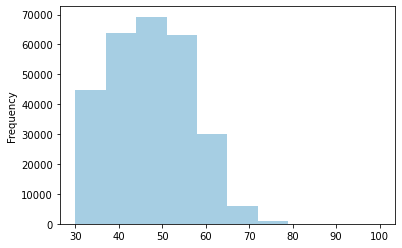

In [152]:
df_noise_day['Lden'].plot(kind='hist')

LNacht by Region - total

In [352]:
df_noise_day.groupby('region').LNacht.describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Berlin,18390.0,40.977569,7.217202,30.0,34.7,40.1,46.4,65.3
Bremen,209.0,41.924880,6.445642,30.0,37.6,44.0,46.7,54.5
Dortmund,1374.0,37.328748,4.625051,30.0,33.4,37.2,40.5,55.7
Dresden,1083.0,46.853001,3.706546,30.3,45.0,47.1,49.3,56.5
Duesseldorf,6228.0,47.206599,8.590176,30.0,40.4,48.1,53.7,68.1
Frankfurt,93997.0,41.270044,7.044481,30.0,35.4,40.8,46.3,80.9
Hamburg,6410.0,42.846490,7.692575,30.0,37.0,42.2,47.9,64.2
Hannover,8151.0,42.586505,6.160129,30.0,37.9,42.5,47.4,58.9
Koeln-Bonn,22391.0,47.027323,7.102909,30.0,42.4,47.7,52.0,78.5


<AxesSubplot:ylabel='Frequency'>

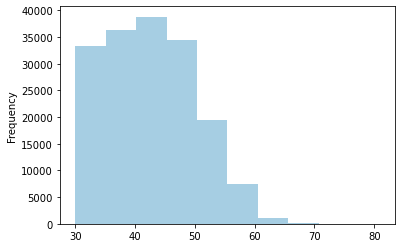

In [203]:
df_noise_day['LNacht'].plot(kind='hist')

In [204]:
df_noise_day.groupby(['region','Date']).LNacht.describe()

count       mean       std   min     25%    50%     75%  \
region   Date                                                                  
Berlin   2017-01-01   14.0  41.521429  8.823324  30.3  33.175  40.60  50.425   
         2017-01-02   16.0  39.387500  7.883728  30.7  32.775  36.15  45.450   
         2017-01-03   14.0  40.792857  7.073185  30.5  34.650  41.30  44.200   
         2017-01-04   19.0  38.836842  6.726251  31.0  33.850  36.40  42.450   
         2017-01-05   14.0  39.792857  6.349254  30.1  37.375  38.30  39.750   
...                    ...        ...       ...   ...     ...    ...     ...   
Muenchen 2021-12-27    7.0  36.071429  5.186751  31.2  33.000  33.60  38.450   
         2021-12-28    6.0  37.116667  5.383834  31.5  33.125  36.35  39.650   
         2021-12-29    7.0  35.942857  5.389761  30.3  32.250  34.30  38.600   
         2021-12-30    3.0  41.533333  4.061199  38.8  39.200  39.60  42.900   
         2021-12-31    0.0        NaN       NaN   NaN     NaN    NaN     NaN   

                      max  
region   Date              
Berlin   2017-01-01  54.8  
         2017-01-02  52.3  
         2017-01-03  50.9  
         2017-01-04  51.9  
         2017-01-05  52.2  
...                   ...  
Muenchen 2021-12-27  44.8  
         2021-12-28  45.7  
         2021-12-29  45.3  
         2021-12-30  46.2  
         2021-12-31   NaN  

[20086 rows x 8 columns]

Check separate Stations

In [381]:
df1 = df_noise_day.query('r_number == 5 and s_number == 10')[['region','Date', 'station','LNacht','Lden']]
df1.head(500)


,region,Date,station,LNacht,Lden
46857,Hannover,2017-08-01,Isernhagen/Altwarmbuechen,NaN,NaN
46858,Hannover,2017-08-02,Isernhagen/Altwarmbuechen,NaN,NaN
46859,Hannover,2017-08-03,Isernhagen/Altwarmbuechen,NaN,NaN
46860,Hannover,2017-08-04,Isernhagen/Altwarmbuechen,NaN,NaN
46861,Hannover,2017-08-05,Isernhagen/Altwarmbuechen,38.9,44.8
...,...,...,...,...,...
150447,Hannover,2018-12-09,Isernhagen/Altwarmbuechen,38.0,45.4
150448,Hannover,2018-12-10,Isernhagen/Altwarmbuechen,31.4,40.5
150449,Hannover,2018-12-11,Isernhagen/Altwarmbuechen,33.5,42.5
150450,Hannover,2018-12-12,Isernhagen/Altwarmbuechen,40.8,48.8


LNacht for the cities from 2017-2021 with max

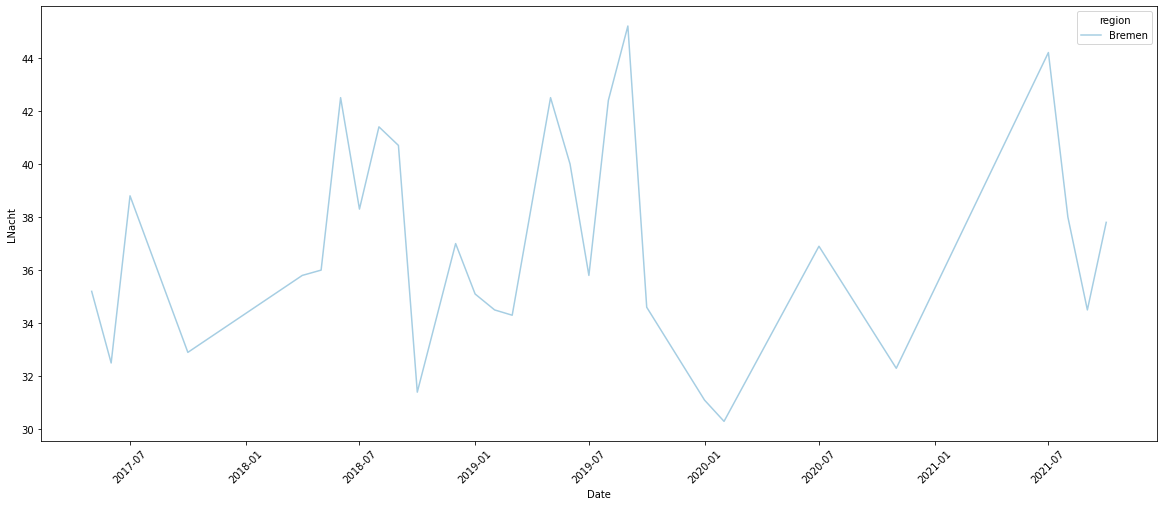

In [384]:
selection_cities = [1,2,16,9]

#df1 = df_noise_day[df_noise_day['r_number'].isin(cities)]
df1 = df_noise_month[df_noise_month['r_number'].isin(selection_cities)][['region','Date','LNacht']]
df2 = df1.groupby(['region','Date']).max('LNacht').reset_index()


plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
fig= sns.lineplot(data = df2, x='Date',y='LNacht',hue='region')


LNacht for the cities from 2017-2021 with median

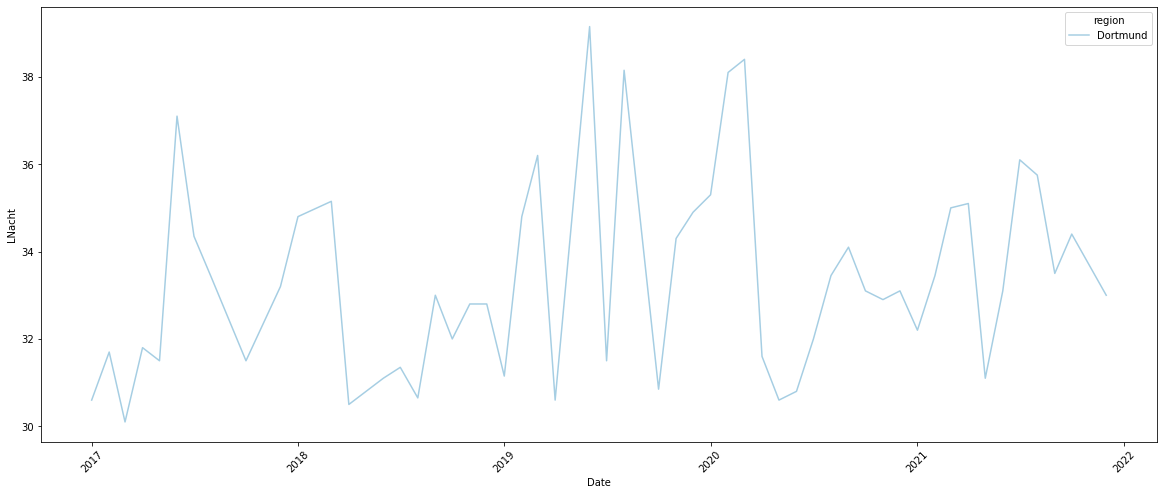

In [385]:
selection_cities = [14]

df1 = df_noise_month[df_noise_month['r_number'].isin(selection_cities)][['region','Date','LNacht']]
df2 = df1.groupby(['region','Date']).median('LNacht').reset_index()


plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
fig= sns.lineplot(data = df2, x='Date',y='LNacht',hue='region')

covid breakdown is visible
Leipzig as outlier: cargo airport for amazon and covid meds & test



Lden for the cities from 2017-2021 with median:

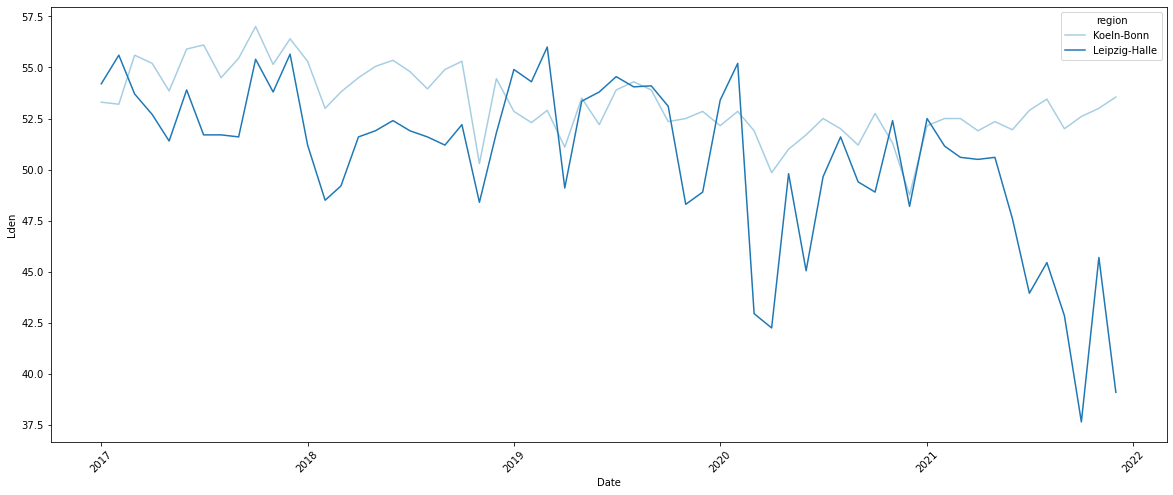

In [329]:
selection_cities = [3,9]

#cities = [2,24,14,27,4,1,16,5,3,9,18]

df1 = df_noise_month[df_noise_month['r_number'].isin(selection_cities)][['region','Date','Lden']]
df2 = df1.groupby(['region','Date']).median('Lden').reset_index()


plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
fig= sns.lineplot(data = df2, x='Date',y='Lden',hue='region')

Frankfurt LNacht 2017-2021 (median)

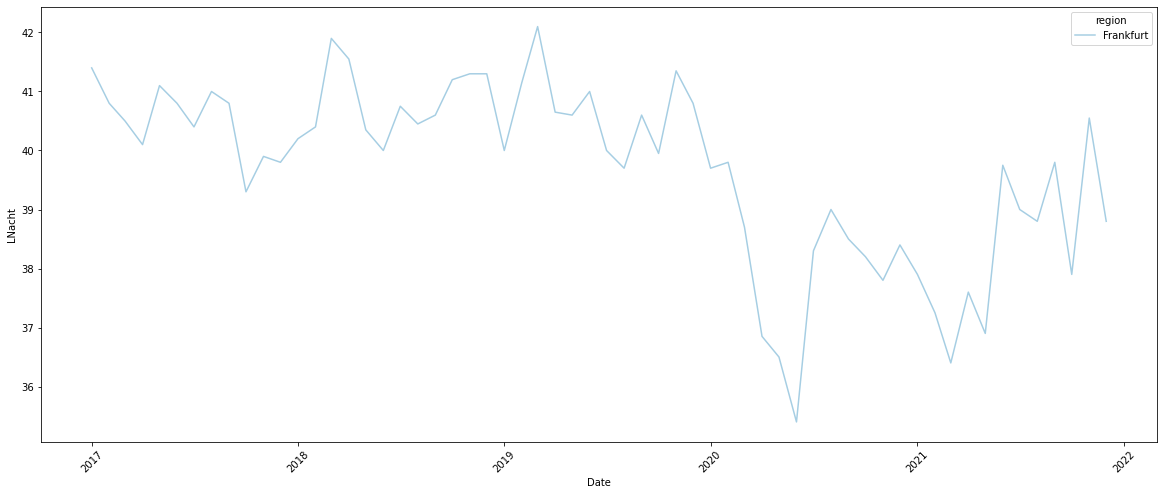

In [161]:
selection_cities = [1]

df1 = df_noise_month[df_noise_month['r_number'].isin(selection_cities)][['region','Date','LNacht']]
df2 = df1.groupby(['region','Date']).median('LNacht').reset_index()

plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
fig= sns.lineplot(data = df2, x='Date',y='LNacht',hue='region')

Frankfurt LNacht 2017-2021 (max)
- higher differences to the mean because of different stations - not all seem to be affected by the flights

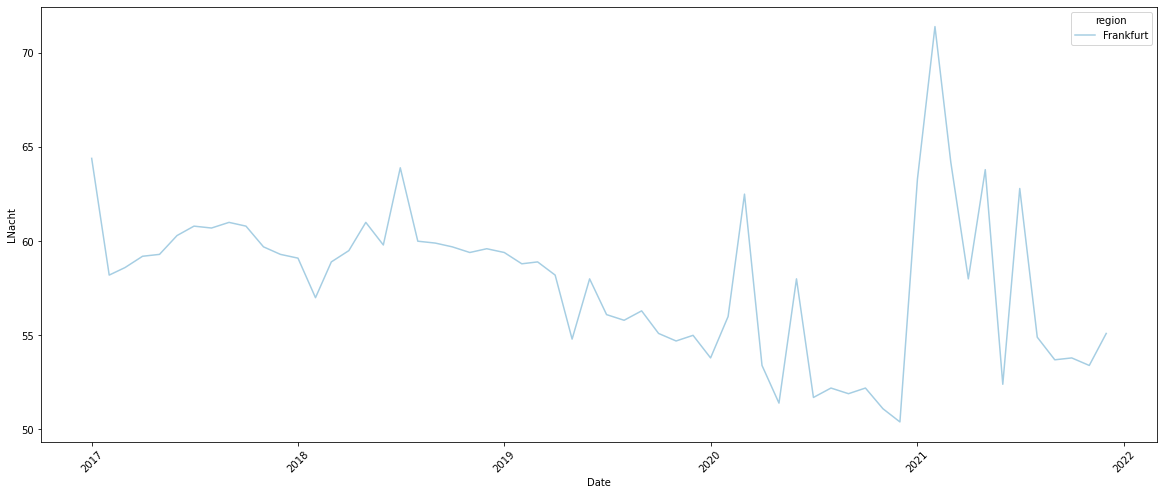

In [325]:
selection_cities = [1]

df1 = df_noise_month[df_noise_month['r_number'].isin(selection_cities)][['region','Date','LNacht']]
df2 = df1.groupby(['region','Date']).max('LNacht').reset_index()


plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
fig= sns.lineplot(data = df2, x='Date',y='LNacht',hue='region')

In [164]:
df_noise_month[(df_noise_month['r_number'] == 18)]


,Date,Lden,LTag(22),LNacht,r_number,region,s_number,station
2415,2017-01-01,48.9,48.8,37.3,18,Muenchen,6,Freising/Lerchenfeld
2416,2017-02-01,47.8,46.0,39.3,18,Muenchen,6,Freising/Lerchenfeld
2417,2017-03-01,49.3,48.7,34.5,18,Muenchen,6,Freising/Lerchenfeld
2418,2017-04-01,47.8,46.1,37.7,18,Muenchen,6,Freising/Lerchenfeld
2419,2017-05-01,47.0,45.6,36.3,18,Muenchen,6,Freising/Lerchenfeld
...,...,...,...,...,...,...,...,...
13843,2021-08-01,41.7,39.6,32.2,18,Muenchen,10,Markt Schwaben (ZMS2)
13844,2021-09-01,39.2,38.2,NaN,18,Muenchen,10,Markt Schwaben (ZMS2)
13845,2021-10-01,41.0,40.8,NaN,18,Muenchen,10,Markt Schwaben (ZMS2)
13846,2021-11-01,38.2,34.8,NaN,18,Muenchen,10,Markt Schwaben (ZMS2)


Boxplot for all cities of LNacht - day Basis

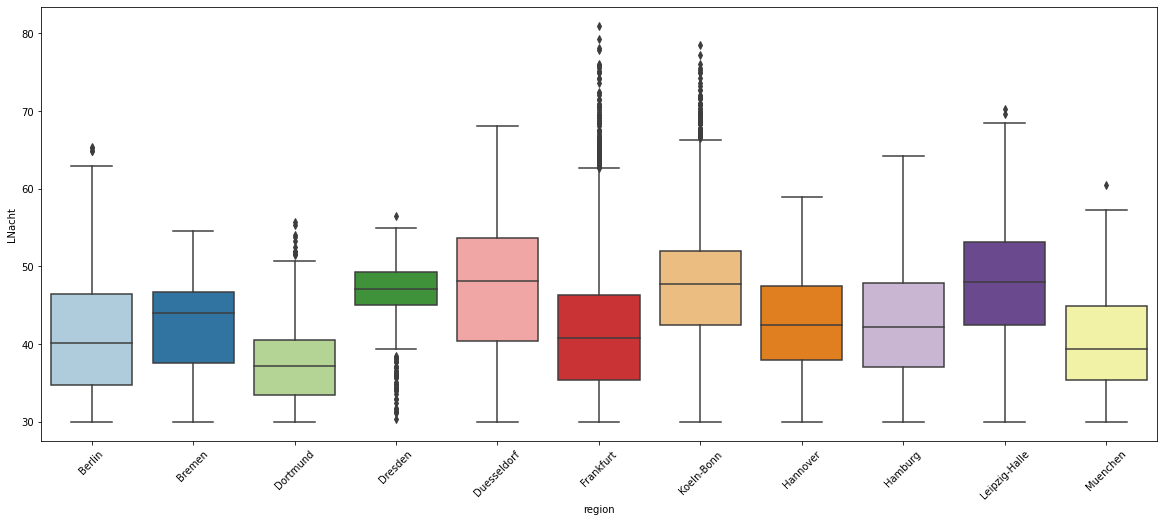

In [207]:
df1 = df_noise_day[['region','LNacht']]

plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
sns.set_palette("Paired")
fig = sns.boxplot(x='region', y='LNacht', data=df1)


Boxplot for all cities of Lden - day basis

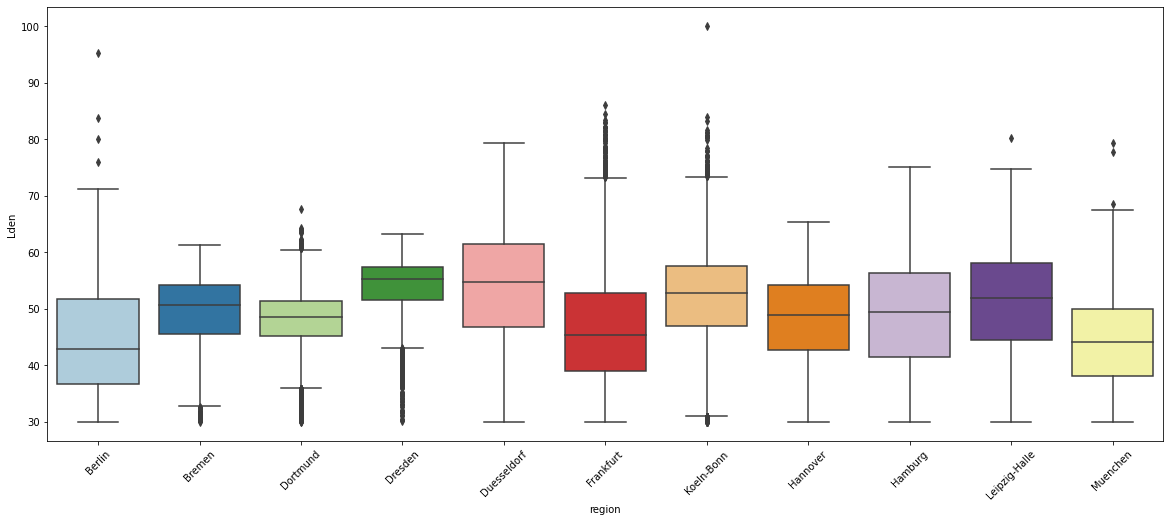

In [208]:
df1 = df_noise_day[['region','Lden']]
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
sns.set_palette("Paired")
fig = sns.boxplot(x='region', y='Lden', data=df1)

In [209]:
# Mean grouped by day
df_noise_day.groupby(pd.Grouper(key='Date', freq='Y'))['Lden'].mean()

Date
2017-12-31    48.157308
2018-12-31    48.230298
2019-12-31    47.904138
2020-12-31    45.314520
2021-12-31    45.813655
Freq: A-DEC, Name: Lden, dtype: float64

In [288]:
# Mean grouped by day
df_noise_day.groupby(pd.Grouper(key='Date', freq='Y'))['Lden'].max()

Date
2017-12-31    100.0
2018-12-31     83.4
2019-12-31     95.3
2020-12-31     81.7
2021-12-31     86.1
Freq: A-DEC, Name: Lden, dtype: float64

### Median Noise overall ranked by highest Region - *** by day***

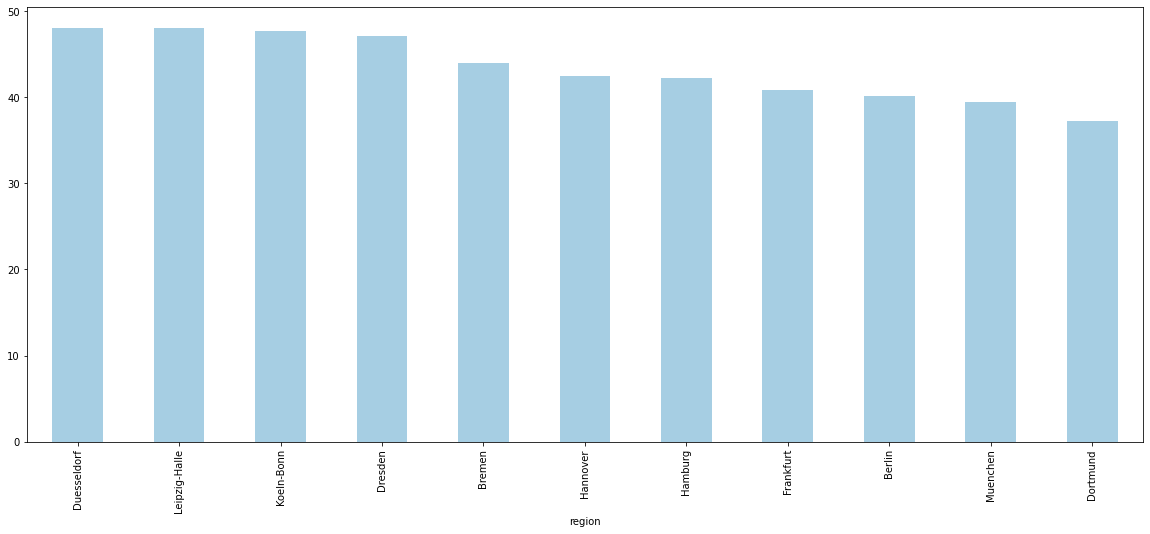

In [217]:
df1 = df_noise_day[['region','station','Date','LNacht']]
groupby_obj = df1.groupby('region')['LNacht'].median().sort_values(ascending=False).head(25)
groupby_obj.plot(kind='bar', figsize=(20,8));

### Median Noise overall ranked by highest Region and year - *** by day***

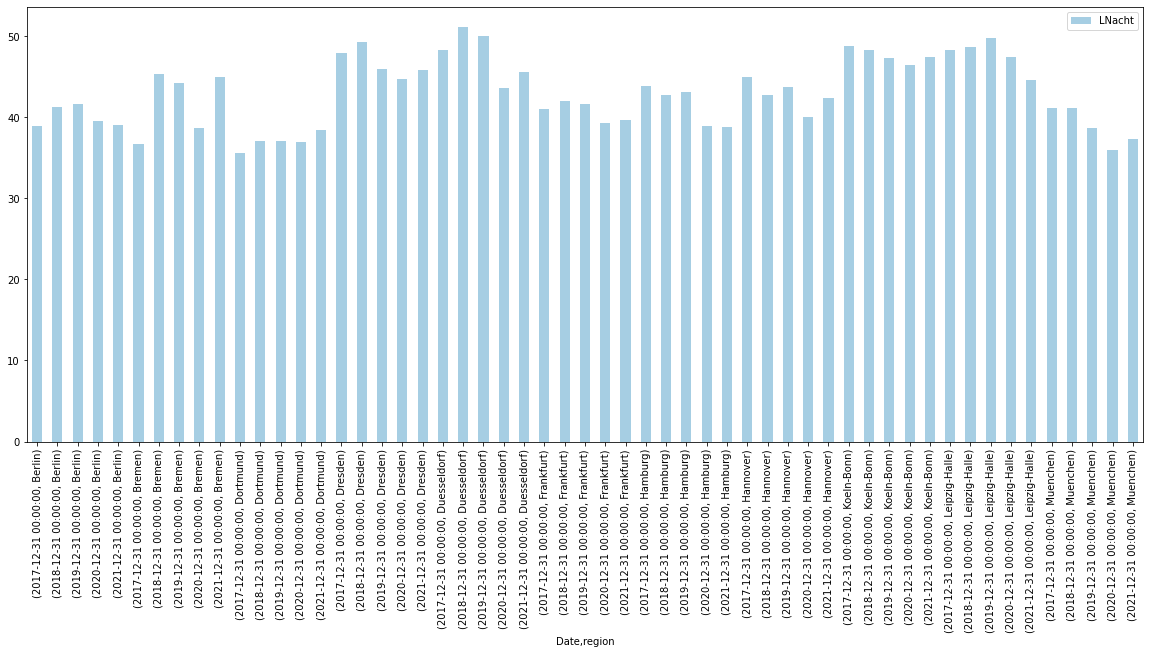

In [289]:
df1 = df_noise_day[['region','station','Date','LNacht']]
groupby_obj = df1.groupby([pd.Grouper(key='Date', freq='Y'),'region'])['region','Date','LNacht'].median().sort_values(['region','Date'])
groupby_obj.plot(kind='bar', figsize=(20,8));

#### Trend of Lden or LNacht per Region separately

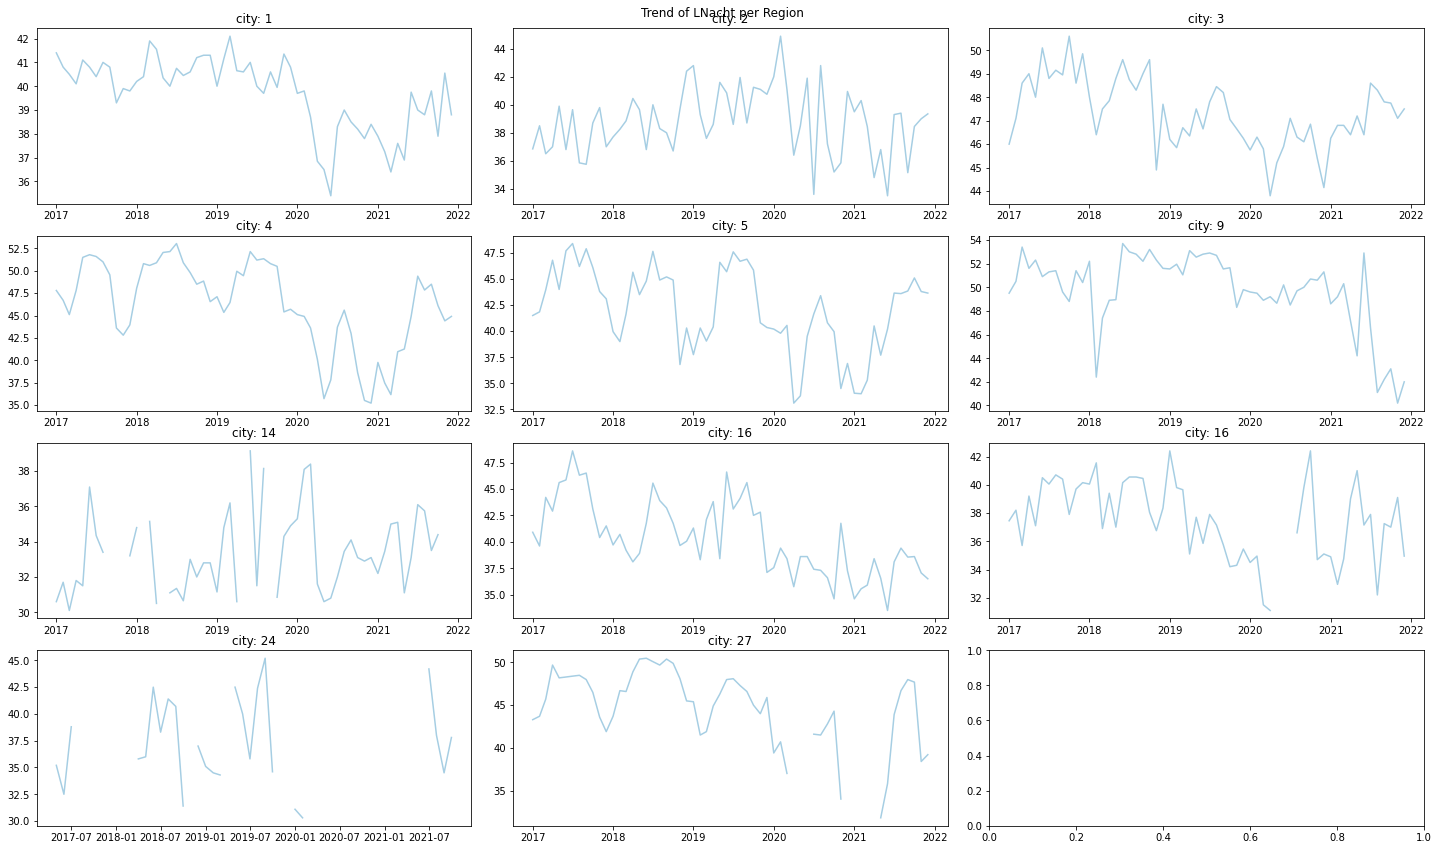

In [344]:
filter = 'LNacht'
#filter = 'Lden'

# noise_day with grouper:
#groupby_obj = df_noise_day[['region','Date',filter,'r_number']].groupby([pd.Grouper(key='Date', freq='m'),'region'])['region','Date',filter,'r_number'].max().sort_values(['region','Date']).reset_index()

# noise month without grouper:
groupby_obj = df_noise_month[['region','Date',filter,'r_number']].groupby(['Date','region'])['region','Date',filter,'r_number'].median().sort_values(['region','Date']).reset_index()


fig, axs = plt.subplots(4,3, figsize=(20,12))
fig.suptitle(f'Trend of {filter} per Region')
fig.tight_layout()

x = groupby_obj[groupby_obj['r_number'] == 1][['Date']].values
y = groupby_obj[groupby_obj['r_number'] == 1][[filter]].values
axs[0,0].plot(x, y)
axs[0,0].set_title('city: 1')

x = groupby_obj[groupby_obj['r_number'] == 2][['Date']].values
y = groupby_obj[groupby_obj['r_number'] == 2][[filter]].values
axs[0,1].plot(x, y)
axs[0,1].set_title('city: 2')

x = groupby_obj[groupby_obj['r_number'] == 3][['Date']].values
y = groupby_obj[groupby_obj['r_number'] == 3][[filter]].values
axs[0,2].plot(x, y)
axs[0,2].set_title('city: 3')

x = groupby_obj[groupby_obj['r_number'] == 4][['Date']].values
y = groupby_obj[groupby_obj['r_number'] == 4][[filter]].values
axs[1,0].plot(x, y)
axs[1,0].set_title('city: 4')

x = groupby_obj[groupby_obj['r_number'] == 5][['Date']].values
y = groupby_obj[groupby_obj['r_number'] == 5][[filter]].values
axs[1,1].plot(x, y)
axs[1,1].set_title('city: 5')

x = groupby_obj[groupby_obj['r_number'] == 9][['Date']].values
y = groupby_obj[groupby_obj['r_number'] == 9][[filter]].values
axs[1,2].plot(x, y)
axs[1,2].set_title('city: 9')

x = groupby_obj[groupby_obj['r_number'] == 14][['Date']].values
y = groupby_obj[groupby_obj['r_number'] == 14][[filter]].values
axs[2,0].plot(x, y)
axs[2,0].set_title('city: 14')

x = groupby_obj[groupby_obj['r_number'] == 16][['Date']].values
y = groupby_obj[groupby_obj['r_number'] == 16][[filter]].values
axs[2,1].plot(x, y)
axs[2,1].set_title('city: 16')

x = groupby_obj[groupby_obj['r_number'] == 18][['Date']].values
y = groupby_obj[groupby_obj['r_number'] == 18][[filter]].values
axs[2,2].plot(x, y)
axs[2,2].set_title('city: 16')

x = groupby_obj[groupby_obj['r_number'] == 24][['Date']].values
y = groupby_obj[groupby_obj['r_number'] == 24][[filter]].values
axs[3,0].plot(x, y)
axs[3,0].set_title('city: 24')

x = groupby_obj[groupby_obj['r_number'] == 27][['Date']].values
y = groupby_obj[groupby_obj['r_number'] == 27][[filter]].values
axs[3,1].plot(x, y)
axs[3,1].set_title('city: 27');



Median Noise overall ranked by highest Region - *** nach Month***

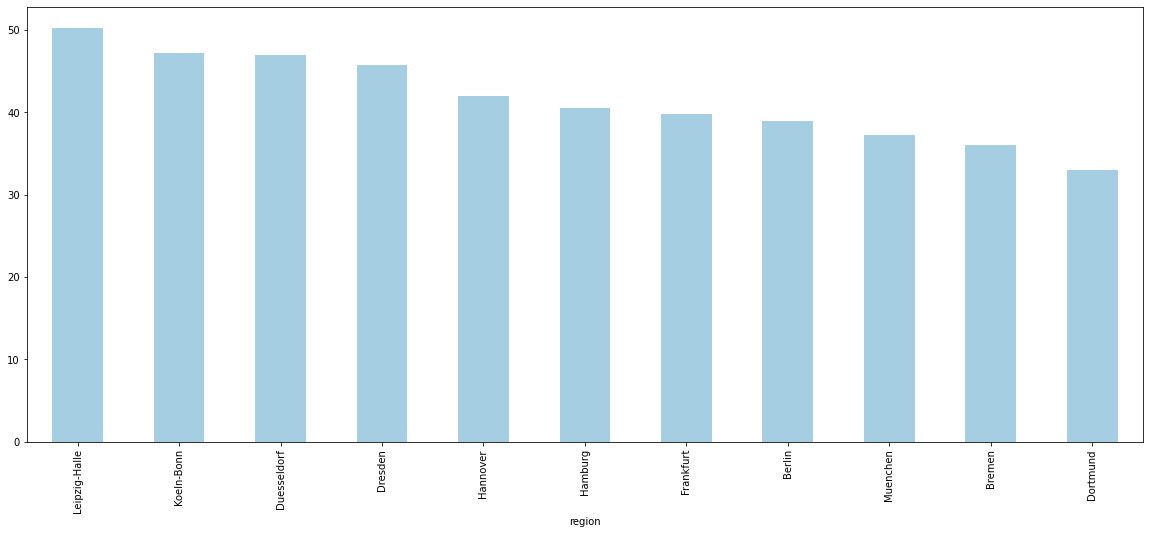

In [218]:
#selection_cities = [2,24,14,27,4,1,16,5,3,9,18]
#df1 = df_noise_all[df_noise_all['r_number'].isin(selection_cities)][['region','Date','Lden']]
df1 = df_noise_month[['region','station','Date','LNacht']]

groupby_obj = df1.groupby('region')['LNacht'].median().sort_values(ascending=False).head(25)
groupby_obj.plot(kind='bar', figsize=(20,8));

Median Noise overall ranked by lowest Station

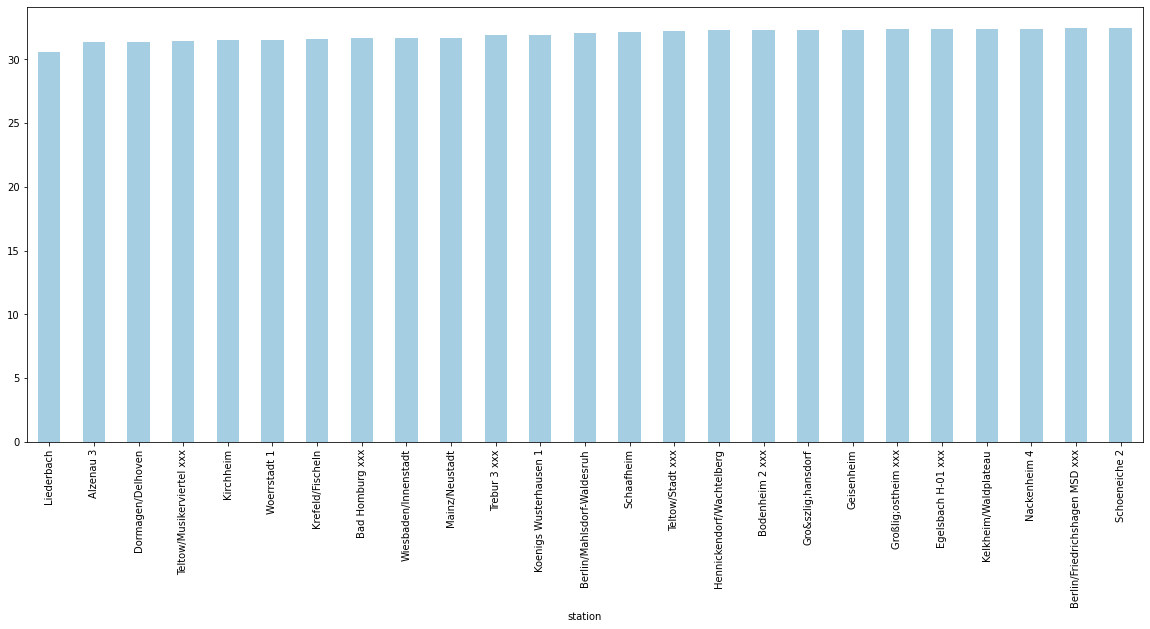

In [212]:
#selection_cities = [2,24,14,27,4,1,16,5,3,9,18]
#df1 = df_noise_day[df_noise_day['r_number'].isin(selection_cities)][['region','Date','Lden']]
df1 = df_noise_day[['region','station','Date','LNacht']]groupby_obj = df1.groupby('station')['LNacht'].median().sort_values(ascending=True).head(25)

groupby_obj.plot(kind='bar', figsize=(20,8));

Median Noise overall ranked by highest Station

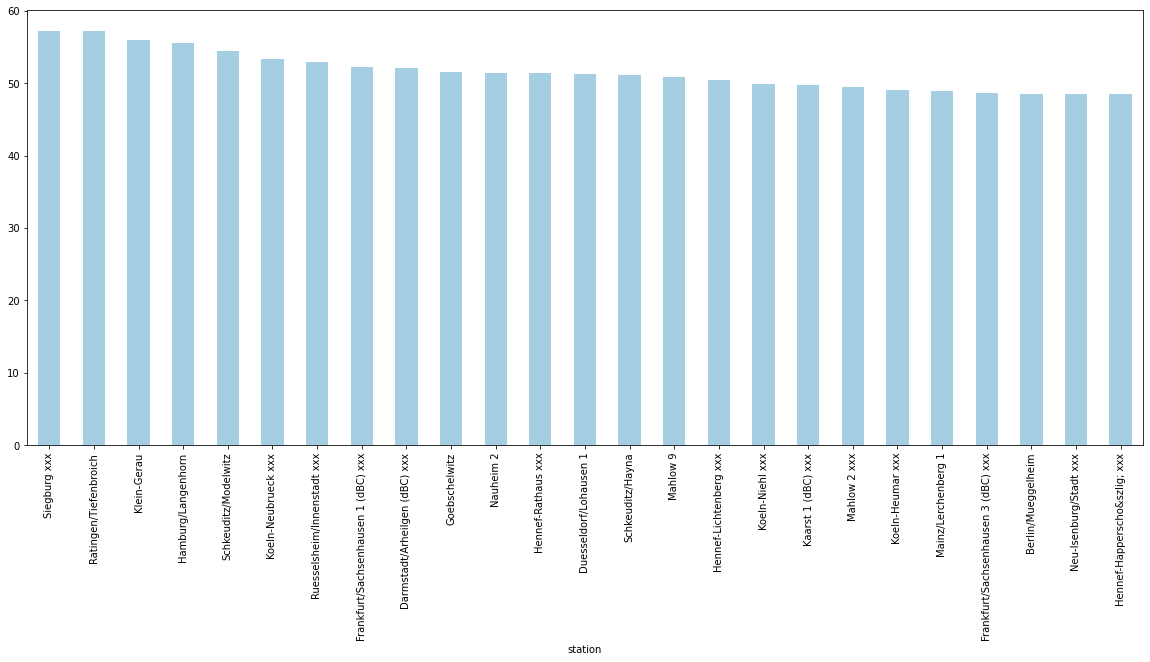

In [213]:
#selection_cities = [2,24,14,27,4,1,16,5,3,9,18]
#df1 = df_noise_day[df_noise_all['r_number'].isin(selection_cities)][['region','Date','Lden']]
df1 = df_noise_day[['region','station','Date','LNacht']]

groupby_obj = df1.groupby('station')['LNacht'].median().sort_values(ascending=False).head(25)
groupby_obj.plot(kind='bar', figsize=(20,8));

don't: 
- live in siegburg or ratingen
- live in düsseldorf, leipzip or köln/bonn

do:
- move to liederbach, alzenau
- move to münchen or dortmund



check for correlation of noise_month_station with flights


In [22]:
# load both tables from sql
# calling the noise per month table from sql

sql_query = 'SELECT * FROM cap_air.noise_day_stations'
noise_day_stations = pd.read_sql_query(sql_query, conn)
display(noise_day_stations)

sql_query2 = 'SELECT * FROM cap_air.df_flights_tableau'
df_flights_tableau = pd.read_sql_query(sql_query2, conn)
display(df_flights_tableau)


/opt/homebrew/Caskroom/miniconda/base/envs/capstone/lib/python3.9/site-packages/pandas/io/sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Date,LTag(18),LTagrand,LNacht,Lden,LTag(22),Ldn,NAT,r_number,region,s_number,station
0,2018-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Frankfurt,212,Raunheim Sued xxx
1,2018-05-01,56.5,54.7,47.8,57.6,56.1,56.7,0.0,1,Frankfurt,99,Neu-Isenburg/Stadt xxx
2,2018-05-02,57.3,56.4,44.8,57.8,57.1,56.5,1.0,1,Frankfurt,99,Neu-Isenburg/Stadt xxx
3,2018-05-03,58.5,57.2,52.5,60.8,58.2,60.1,14.0,1,Frankfurt,99,Neu-Isenburg/Stadt xxx
4,2018-05-04,58.8,59.4,53.3,61.9,59.0,60.9,18.0,1,Frankfurt,99,Neu-Isenburg/Stadt xxx
...,...,...,...,...,...,...,...,...,...,...,...,...
56620,2018-05-27,40.3,43.3,35.2,44.4,41.3,43.0,1.0,1,Frankfurt,190,Kelsterbach 4 xxx
56621,2018-05-28,33.7,NaN,33.1,39.1,32.5,39.1,0.0,1,Frankfurt,190,Kelsterbach 4 xxx
56622,2018-05-29,38.7,42.9,36.0,44.4,40.2,43.1,0.0,1,Frankfurt,190,Kelsterbach 4 xxx
56623,2018-05-30,45.9,43.6,33.8,46.0,45.4,45.0,1.0,1,Frankfurt,190,Kelsterbach 4 xxx


/opt/homebrew/Caskroom/miniconda/base/envs/capstone/lib/python3.9/site-packages/pandas/io/sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Date,dep/arr,DF/NF,Airport,Count of flights_ger,#_dep_DF,#_dep_NF,#_arr_DF,#_arr_NF,city
0,01.01.2017,arrival,dayflight,EDLW,2,0,0,2,0,Dortmund
1,01.01.2017,arrival,dayflight,EDDW,3,0,0,3,0,Bremen
2,01.01.2017,arrival,dayflight,EDDV,23,0,0,23,0,Hannover
3,01.01.2017,arrival,dayflight,EDDT,136,0,0,136,0,Berlin
4,01.01.2017,arrival,dayflight,EDDP,5,0,0,5,0,Leipzig
...,...,...,...,...,...,...,...,...,...,...
81521,06.01.2022,departure,nightflight,EDDM,22,0,22,0,0,Munich
81522,06.01.2022,departure,nightflight,EDDK,55,0,55,0,0,Cologne
81523,06.01.2022,departure,nightflight,EDDH,1,0,1,0,0,Hamburg
81524,06.01.2022,departure,nightflight,EDDF,20,0,20,0,0,Frankfurt


In [38]:
import datetime
df_flights_tableau['Date'] = pd.to_datetime(df_flights_tableau['Date'],format='%d.%m.%Y')
df_flights_tableau.rename(columns={'city':'region'},inplace=True)  
  
df_flights_tableau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81526 entries, 0 to 81525
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  81526 non-null  datetime64[ns]
 1   dep/arr               81526 non-null  object        
 2   DF/NF                 81526 non-null  object        
 3   Airport               81526 non-null  object        
 4   Count of flights_ger  81526 non-null  int64         
 5   #_dep_DF              81526 non-null  int64         
 6   #_dep_NF              81526 non-null  int64         
 7   #_arr_DF              81526 non-null  int64         
 8   #_arr_NF              81526 non-null  int64         
 9   region                81526 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 6.2+ MB


In [50]:
# Grouped by region and date for the noise data
x = noise_day_stations.groupby([pd.Grouper(key='Date', freq='Y'),'region']).max()
x

LTag(18)  LTagrand  LNacht  Lden  LTag(22)   Ldn   NAT  \
Date       region                                                              
2017-12-31 Frankfurt      74.2      74.8    79.2  84.4      72.9  84.4  55.0   
           Hamburg        74.7      74.8    63.8  75.1      74.8  73.7  30.0   
           Hannover       61.4      62.0    58.9  65.4      61.2  64.9  35.0   
2018-12-31 Frankfurt      66.2      66.6    62.4  68.7      66.1  68.1  41.0   
           Hamburg        74.6      74.3    63.3  74.9      74.2  73.6  31.0   
           Hannover       61.1      61.4    56.8  64.4      60.7  63.6  27.0   
2019-12-31 Frankfurt      68.1      66.1    59.4  68.0      67.4  67.3  44.0   
           Hamburg        71.8      72.0    64.2  72.7      71.8  71.8  31.0   
           Hannover       60.8      60.4    56.8  63.1      60.1  62.8  32.0   
2020-12-31 Frankfurt      65.3      67.1    62.8  68.3      65.5  68.2  26.0   
           Hamburg        69.2      69.8    61.8  71.3      68.9  70.1  17.0   
           Hannover       57.3      58.2    53.1  60.0      56.9  59.5  13.0   
2021-12-31 Frankfurt      71.8      64.7    64.1  72.4      70.7  72.2  40.0   
           Hamburg        68.3      68.3    62.2  70.2      67.9  69.3  22.0   
           Hannover       59.3      61.3    56.5  63.2      59.9  62.7  19.0   

                      r_number  s_number            station  
Date       region                                            
2017-12-31 Frankfurt         1       212  Raunheim Sued xxx  
           Hamburg          16        12        Norderstedt  
           Hannover          5        10        Langenhagen  
2018-12-31 Frankfurt         1       292  Raunheim Sued xxx  
           Hamburg          16        15        Norderstedt  
           Hannover          5        11        Langenhagen  
2019-12-31 Frankfurt         1       298  Raunheim Sued xxx  
           Hamburg          16        15        Norderstedt  
           Hannover          5        11        Langenhagen  
2020-12-31 Frankfurt         1       301  Raunheim Sued xxx  
           Hamburg          16        15        Norderstedt  
           Hannover          5        11        Langenhagen  
2021-12-31 Frankfurt         1       301  Raunheim Sued xxx  
           Hamburg          16        15        Norderstedt  
           Hannover          5        11        Langenhagen

In [53]:
# Grouped by region and date for flight data
# Sum up the number of nightflights (arrival and departure)

df_flights_tableau['nightflights'] = df_flights_tableau['#_arr_NF'] + df_flights_tableau['#_dep_NF']
df_flights_tableau

,Date,dep/arr,DF/NF,Airport,Count of flights_ger,#_dep_DF,#_dep_NF,#_arr_DF,#_arr_NF,region,nightflights
0,2017-01-01,arrival,dayflight,EDLW,2,0,0,2,0,Dortmund,0
1,2017-01-01,arrival,dayflight,EDDW,3,0,0,3,0,Bremen,0
2,2017-01-01,arrival,dayflight,EDDV,23,0,0,23,0,Hannover,0
3,2017-01-01,arrival,dayflight,EDDT,136,0,0,136,0,Berlin,0
4,2017-01-01,arrival,dayflight,EDDP,5,0,0,5,0,Leipzig,0
...,...,...,...,...,...,...,...,...,...,...,...
81521,2022-01-06,departure,nightflight,EDDM,22,0,22,0,0,Munich,22
81522,2022-01-06,departure,nightflight,EDDK,55,0,55,0,0,Cologne,55
81523,2022-01-06,departure,nightflight,EDDH,1,0,1,0,0,Hamburg,1
81524,2022-01-06,departure,nightflight,EDDF,20,0,20,0,0,Frankfurt,20


In [54]:
# Join Noise and flight tables

df_noise_flights = pd.merge(df_flights_tableau, x, on=['region','Date'])
df_noise_flights

,Date,dep/arr,DF/NF,Airport,Count of flights_ger,#_dep_DF,#_dep_NF,#_arr_DF,#_arr_NF,region,...,LTag(18),LTagrand,LNacht,Lden,LTag(22),Ldn,NAT,r_number,s_number,station
0,2017-12-31,arrival,dayflight,EDDV,28,0,0,28,0,Hannover,...,61.4,62.0,58.9,65.4,61.2,64.9,35.0,5,10,Langenhagen
1,2017-12-31,arrival,nightflight,EDDV,9,0,0,0,9,Hannover,...,61.4,62.0,58.9,65.4,61.2,64.9,35.0,5,10,Langenhagen
2,2017-12-31,departure,dayflight,EDDV,26,26,0,0,0,Hannover,...,61.4,62.0,58.9,65.4,61.2,64.9,35.0,5,10,Langenhagen
3,2017-12-31,departure,nightflight,EDDV,6,0,6,0,0,Hannover,...,61.4,62.0,58.9,65.4,61.2,64.9,35.0,5,10,Langenhagen
4,2017-12-31,arrival,dayflight,EDDH,114,0,0,114,0,Hamburg,...,74.7,74.8,63.8,75.1,74.8,73.7,30.0,16,12,Norderstedt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2021-12-31,departure,nightflight,EDDV,7,0,7,0,0,Hannover,...,59.3,61.3,56.5,63.2,59.9,62.7,19.0,5,11,Langenhagen
58,2021-12-31,arrival,dayflight,EDDF,317,0,0,317,0,Frankfurt,...,71.8,64.7,64.1,72.4,70.7,72.2,40.0,1,301,Raunheim Sued xxx
59,2021-12-31,arrival,nightflight,EDDF,24,0,0,0,24,Frankfurt,...,71.8,64.7,64.1,72.4,70.7,72.2,40.0,1,301,Raunheim Sued xxx
60,2021-12-31,departure,dayflight,EDDF,288,288,0,0,0,Frankfurt,...,71.8,64.7,64.1,72.4,70.7,72.2,40.0,1,301,Raunheim Sued xxx


In [55]:
# Checking the correlations
df_noise_flights.corr()

,Count of flights_ger,#_dep_DF,#_dep_NF,#_arr_DF,#_arr_NF,nightflights,LTag(18),LTagrand,LNacht,Lden,LTag(22),Ldn,NAT,r_number,s_number
Count of flights_ger,1.000000,0.582774,-0.208749,0.712912,-0.179722,-0.252871,0.247322,0.145719,0.293342,0.259348,0.228648,0.274626,0.474450,-0.318469,0.521451
#_dep_DF,0.582774,1.000000,-0.146544,-0.150948,-0.158965,-0.209902,0.155127,0.090300,0.163003,0.149607,0.144961,0.157427,0.274125,-0.176834,0.312214
#_dep_NF,-0.208749,-0.146544,1.000000,-0.140274,-0.147725,0.215457,-0.138863,-0.159316,-0.045896,-0.107016,-0.142814,-0.094711,0.151830,-0.261787,0.184448
#_arr_DF,0.712912,-0.150948,-0.140274,1.000000,-0.152164,-0.200922,0.163349,0.102621,0.201952,0.178643,0.150872,0.188649,0.304701,-0.197902,0.323464
#_arr_NF,-0.179722,-0.158965,-0.147725,-0.152164,1.000000,0.933971,0.031314,-0.022010,0.119891,0.068827,0.019080,0.083538,0.274312,-0.288296,0.319925
nightflights,-0.252871,-0.209902,0.215457,-0.200922,0.933971,1.000000,-0.019255,-0.079294,0.101791,0.029290,-0.032762,0.048261,0.325699,-0.379235,0.382521
LTag(18),0.247322,0.155127,-0.138863,0.163349,0.031314,-0.019255,1.000000,0.934147,0.757240,0.913194,0.996745,0.891885,0.479487,0.435472,0.190018
LTagrand,0.145719,0.090300,-0.159316,0.102621,-0.022010,-0.079294,0.934147,1.000000,0.766677,0.903614,0.947246,0.877257,0.364291,0.532488,0.044173
LNacht,0.293342,0.163003,-0.045896,0.201952,0.119891,0.101791,0.757240,0.766677,1.000000,0.947122,0.736218,0.964886,0.682386,0.015421,0.349993
Lden,0.259348,0.149607,-0.107016,0.178643,0.068827,0.029290,0.913194,0.903614,0.947122,1.000000,0.899378,0.997521,0.601288,0.248434,0.225379
